In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [89]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt')

In [64]:
df1.head()

df1.rename(columns={'EXITS                                                               ': 'EXITS'}, inplace=True)
df1.columns[-1]
#df.STATION.unique()

'EXITS'

In [92]:
df=df1[(df1.STATION=='TIMES SQ-42 ST')| (df1.STATION=='FLUSHING-MAIN' )| (df1.STATION=='ATL AV-BARCLAY')]
#df.STATION.unique()

array(['TIMES SQ-42 ST', 'ATL AV-BARCLAY', 'FLUSHING-MAIN'], dtype=object)

Manhattan: 1. 'TIMES SQ-42 ST', 2. 'CHAMBERS ST' 3. '59 ST COLUMBUS'
Queens: 1. 'FLUSHING-MAIN', 2. '74 ST-BROADWAY'
Brooklyn: 1. 'ATL AV-BARCLAY', 2. 'CONEY IS-STILLW'



##Question 1##

In [23]:
"""
df_dict={}
for x in range(len(df)):
    currentid = tuple(df.iloc[x,0:4])
    currentvalue = df.iloc[x,4:11]
    df_dict.setdefault(currentid, [])
    df_dict[currentid].append(currentvalue)
"""









{}


In [65]:
####Question 3####

station_date=df.groupby(['C/A','UNIT','SCP','STATION','DATE'])

In [66]:
entry_date_count=station_date.ENTRIES.apply(lambda x: x.max() - x.min())
entry_date_count

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          06/17/2017     732
                                      06/18/2017     579
                                      06/19/2017    1204
                                      06/20/2017    1348
                                      06/21/2017    1250
                                      06/22/2017    1164
                                      06/23/2017    1316
             02-00-01  59 ST          06/17/2017     670
                                      06/18/2017     509
                                      06/19/2017     970
                                      06/20/2017    1091
                                      06/21/2017    1110
                                                    ... 
TRAM2  R469  00-05-00  RIT-ROOSEVELT  06/19/2017       1
                                      06/20/2017       1
                                      06/21/2017       1
                                      0

In [67]:
entry_date_count=entry_date_count.reset_index()
entry_date_count

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/17/2017,732
1,A002,R051,02-00-00,59 ST,06/18/2017,579
2,A002,R051,02-00-00,59 ST,06/19/2017,1204
3,A002,R051,02-00-00,59 ST,06/20/2017,1348
4,A002,R051,02-00-00,59 ST,06/21/2017,1250
5,A002,R051,02-00-00,59 ST,06/22/2017,1164
6,A002,R051,02-00-00,59 ST,06/23/2017,1316
7,A002,R051,02-00-01,59 ST,06/17/2017,670
8,A002,R051,02-00-01,59 ST,06/18/2017,509
9,A002,R051,02-00-01,59 ST,06/19/2017,970


In [68]:
exit_date_count=station_date.EXITS.apply(lambda x: x.max() - x.min())
exit_date_count
exit_date_count=exit_date_count.reset_index()
exit_date_count.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'EXITS'], dtype='object')

In [92]:
entry_date_count.iloc[0,4]


'06/17/2017'

In [69]:
#change the date to datetime object
#type(dateutil.parser.parse(date_00[0]))
import matplotlib.pyplot as plt
import dateutil.parser
dates=[]
for i in range(0,len(entry_date_count)):
    dates.append(dateutil.parser.parse(entry_date_count.iloc[i,4]))
entry_date_count['DATE_NEW']=dates
entry_date_count

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DATE_NEW
0,A002,R051,02-00-00,59 ST,06/17/2017,732,2017-06-17
1,A002,R051,02-00-00,59 ST,06/18/2017,579,2017-06-18
2,A002,R051,02-00-00,59 ST,06/19/2017,1204,2017-06-19
3,A002,R051,02-00-00,59 ST,06/20/2017,1348,2017-06-20
4,A002,R051,02-00-00,59 ST,06/21/2017,1250,2017-06-21
5,A002,R051,02-00-00,59 ST,06/22/2017,1164,2017-06-22
6,A002,R051,02-00-00,59 ST,06/23/2017,1316,2017-06-23
7,A002,R051,02-00-01,59 ST,06/17/2017,670,2017-06-17
8,A002,R051,02-00-01,59 ST,06/18/2017,509,2017-06-18
9,A002,R051,02-00-01,59 ST,06/19/2017,970,2017-06-19


In [95]:
###Question 4###

date_00=entry_date_count.iloc[0:7, 6]
counts_00=entry_date_count.iloc[0:7, 5]


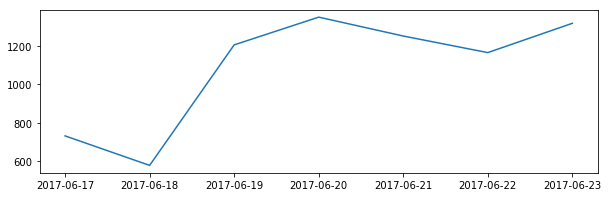

In [96]:
plt.figure(figsize=(10,3))
plt.plot(date_00,counts_00)

In [77]:
#group all entries by station#
#station_entry_week_count=entry_date_count.groupby(['C/A','UNIT','STATION']).ENTRIES.agg(['sum'])
station_entry_week_count=entry_date_count.groupby('STATION').ENTRIES.agg(['sum'])
station_entry_week_count





,sum
STATION,
1 AV,1621136548
103 ST,182027
103 ST-CORONA,118675
104 ST,17764
110 ST,67026
111 ST,98051
116 ST,200731
116 ST-COLUMBIA,73026
121 ST,3976


In [79]:
station_exit_week_count=exit_date_count.groupby('STATION').EXITS.agg(['sum'])
station_exit_week_count

,sum
STATION,
1 AV,167229179
103 ST,113293
103 ST-CORONA,71158
104 ST,4169
110 ST,48349
111 ST,51012
116 ST,101208
116 ST-COLUMBIA,38362
121 ST,706


In [84]:
station_entry_week_count['exit sum']=station_exit_week_count['sum']
station_entry_week_count['total']=station_entry_week_count['exit sum']+station_entry_week_count['sum']
station_entry_week_count


,sum,exit sum,total
STATION,,,
1 AV,1621136548,167229179,1788365727
103 ST,182027,113293,295320
103 ST-CORONA,118675,71158,189833
104 ST,17764,4169,21933
110 ST,67026,48349,115375
111 ST,98051,51012,149063
116 ST,200731,101208,301939
116 ST-COLUMBIA,73026,38362,111388
121 ST,3976,706,4682


In [37]:
##selecting a particular station##
station_entry_week_count=station_entry_week_count.reset_index()
station_entry_week_count
station_entry_week_count.loc[station_entry_week_count.STATION=='1 AV']

,level_0,index,STATION,sum
0,0,0,1 AV,1621136548
